In [31]:
1. What was the change in price of the stock overtime?       

SyntaxError: invalid syntax (2000597550.py, line 1)

In [6]:
#Import useful libraries for data analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

#For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

#For time stamps
from datetime import datetime

#The tech stock we will use for this ananlysis
tech_list= ['AAPL','GOOG','MSFT','AMZN']

#Set up the End and Start times for data grab
end =datetime.now()
start=datetime(end.year-1, end.month, end.day)

for stock in tech_list:
    globals()[stock]=yf.download(stock,start,end)
    
company_list=[AAPL, GOOG, MSFT, AMZN]
company_name= ["APPLE", "GOOGLE", "MICROSOFT","AMAZON"]

for company, com_name in zip(company_list, company_name):
    company['company_name']= com_name
df= pd.concat(company_list, axis=0)
df.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-31,133.199997,133.869995,132.380005,133.679993,133.679993,41901500,AMAZON
2023-08-01,133.550003,133.690002,131.619995,131.690002,131.690002,42098500,AMAZON
2023-08-02,130.149994,130.229996,126.820000,128.210007,128.210007,51027600,AMAZON
2023-08-03,127.480003,129.839996,126.410004,128.910004,128.910004,88585200,AMAZON
2023-08-04,141.059998,143.630005,139.320007,139.570007,139.570007,152938700,AMAZON
2023-08-07,140.990005,142.539993,138.949997,142.220001,142.220001,71213100,AMAZON
2023-08-08,140.619995,140.839996,138.419998,139.940002,139.940002,51710500,AMAZON
2023-08-09,139.970001,140.320007,137.100006,137.850006,137.850006,50017300,AMAZON
2023-08-10,139.070007,140.410004,137.490005,138.559998,138.559998,58879600,AMAZON


In [32]:
#Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for10 days,MA for20 days,MA for30 days
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02,243.000000,233.000000,223.000000
mean,159.367779,161.123453,157.759960,159.484246,159.155497,7.026322e+07,158.542367,157.693642,156.899608
std,18.211956,17.960610,18.487099,18.193480,18.348716,2.385149e+07,18.061570,17.477947,16.786165
min,126.010002,127.769997,124.169998,125.019997,124.656975,6.492090e+06,127.883585,130.563779,133.673060
25%,145.817505,147.360004,144.072502,145.924995,145.488323,5.246878e+07,144.893117,145.137031,144.716133
50%,154.805000,157.095001,153.415001,155.154999,154.694229,6.583690e+07,153.341899,151.394245,151.405334
75%,173.005001,173.862503,171.667503,173.070000,172.765003,8.129510e+07,171.256194,169.722029,168.837387
max,196.240005,198.229996,195.279999,196.449997,196.449997,1.647624e+08,194.215001,192.631500,191.580333


In [33]:
#General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-08-11 to 2023-08-11
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           252 non-null    float64
 1   High           252 non-null    float64
 2   Low            252 non-null    float64
 3   Close          252 non-null    float64
 4   Adj Close      252 non-null    float64
 5   Volume         252 non-null    int64  
 6   company_name   252 non-null    object 
 7   MA for10 days  243 non-null    float64
 8   MA for20 days  233 non-null    float64
 9   MA for30 days  223 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 21.7+ KB


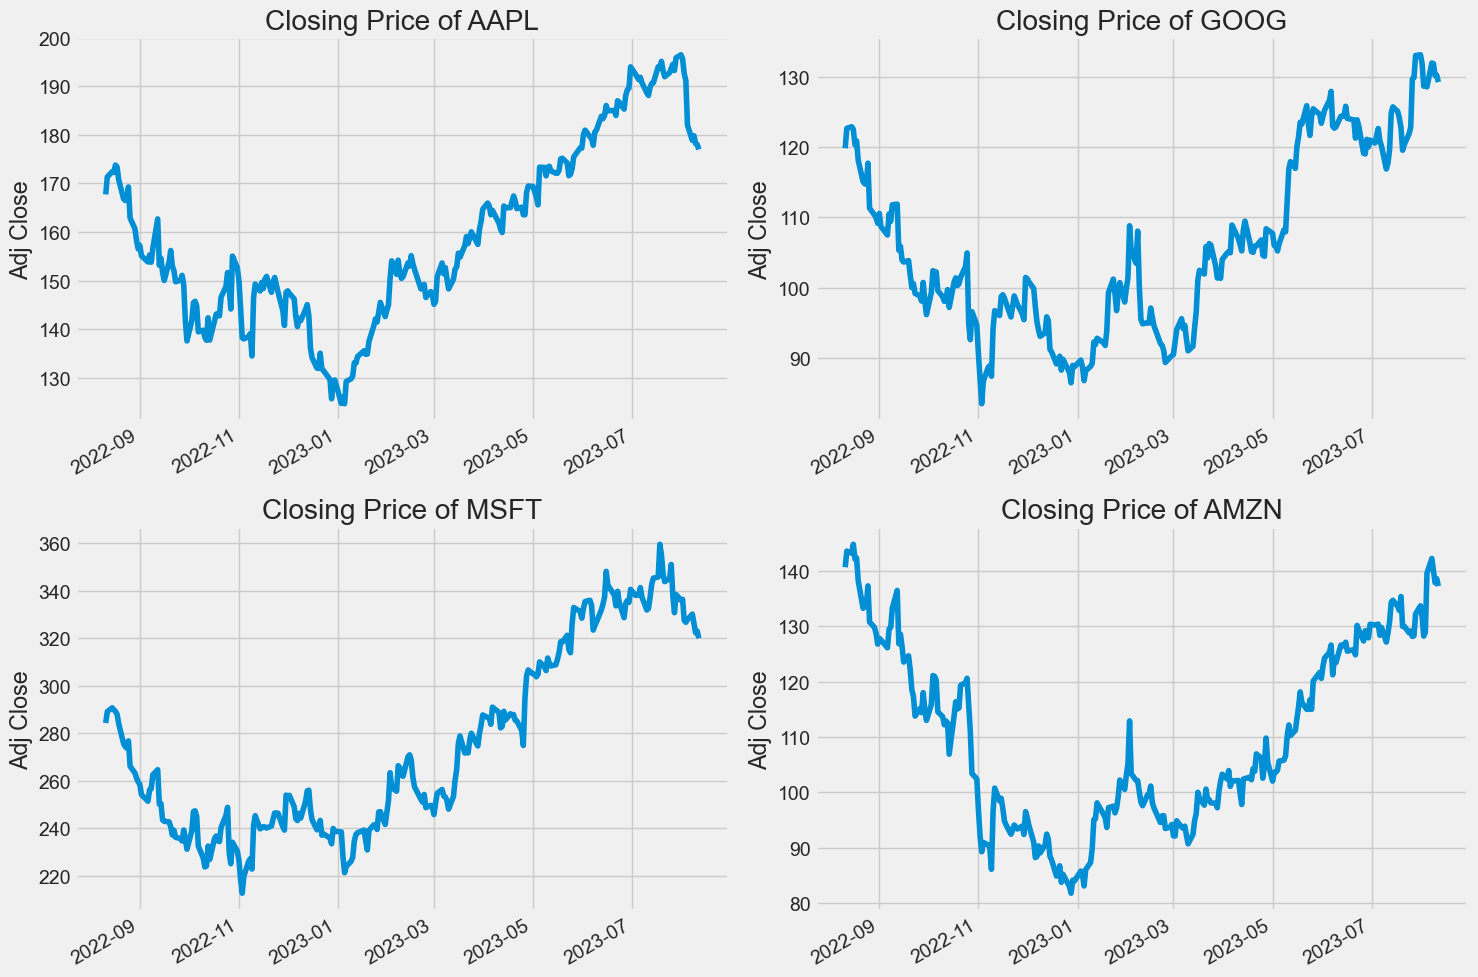

In [15]:
#Lets see a historical view of the closing price
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f'Closing Price of {tech_list[i-1]}')
plt.tight_layout()

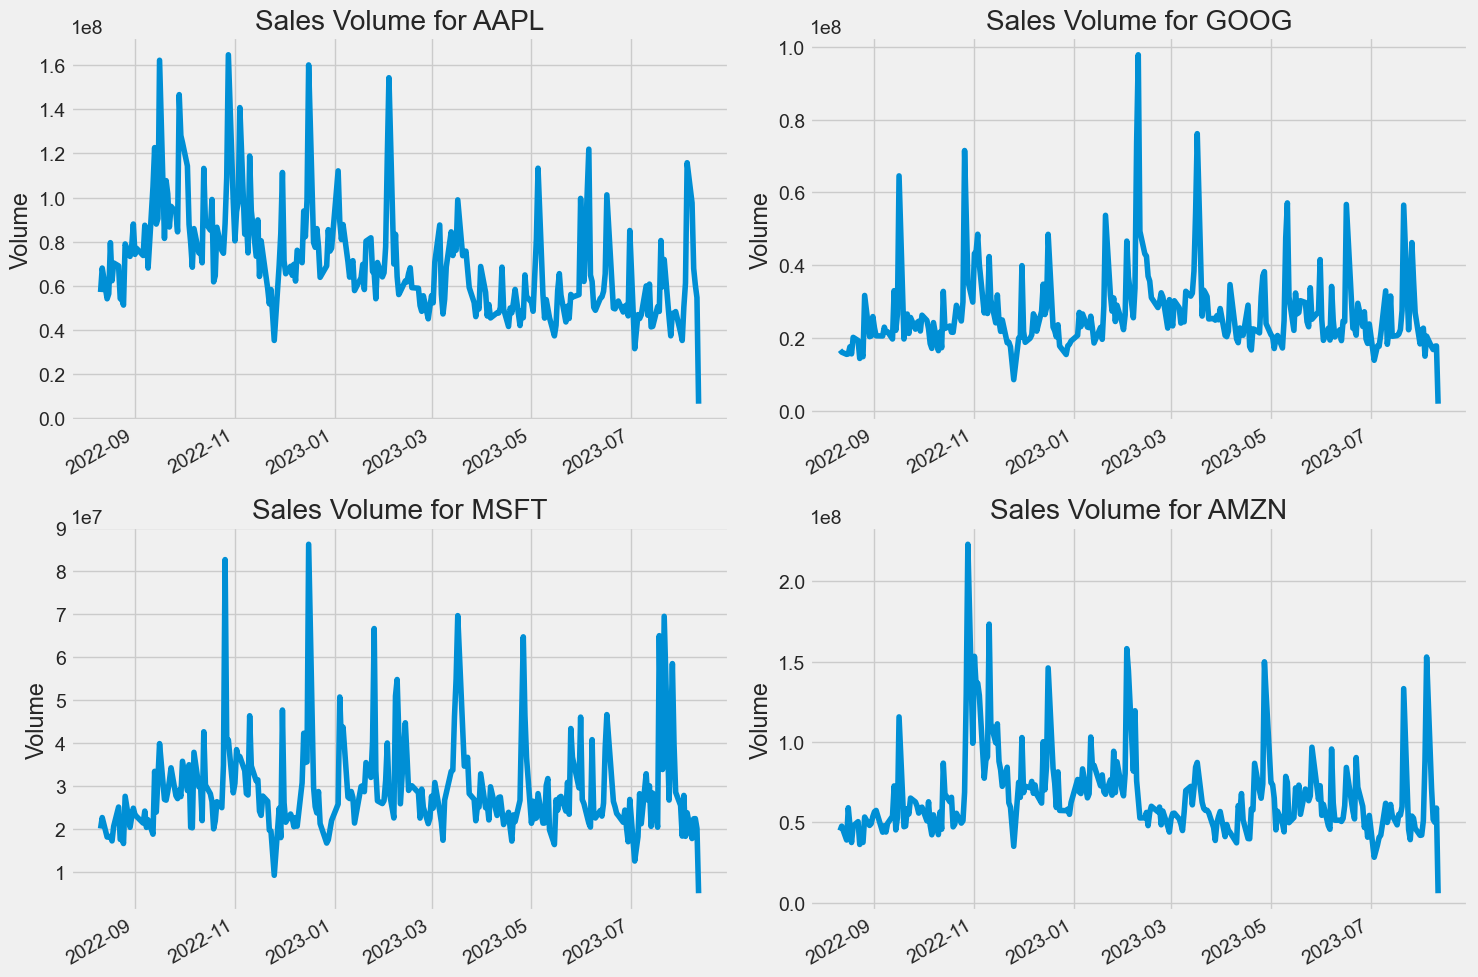

In [34]:
#Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f'Sales Volume for {tech_list[i-1]}')
plt.tight_layout()

In [ ]:
2. What was the moving average of the various stocks?

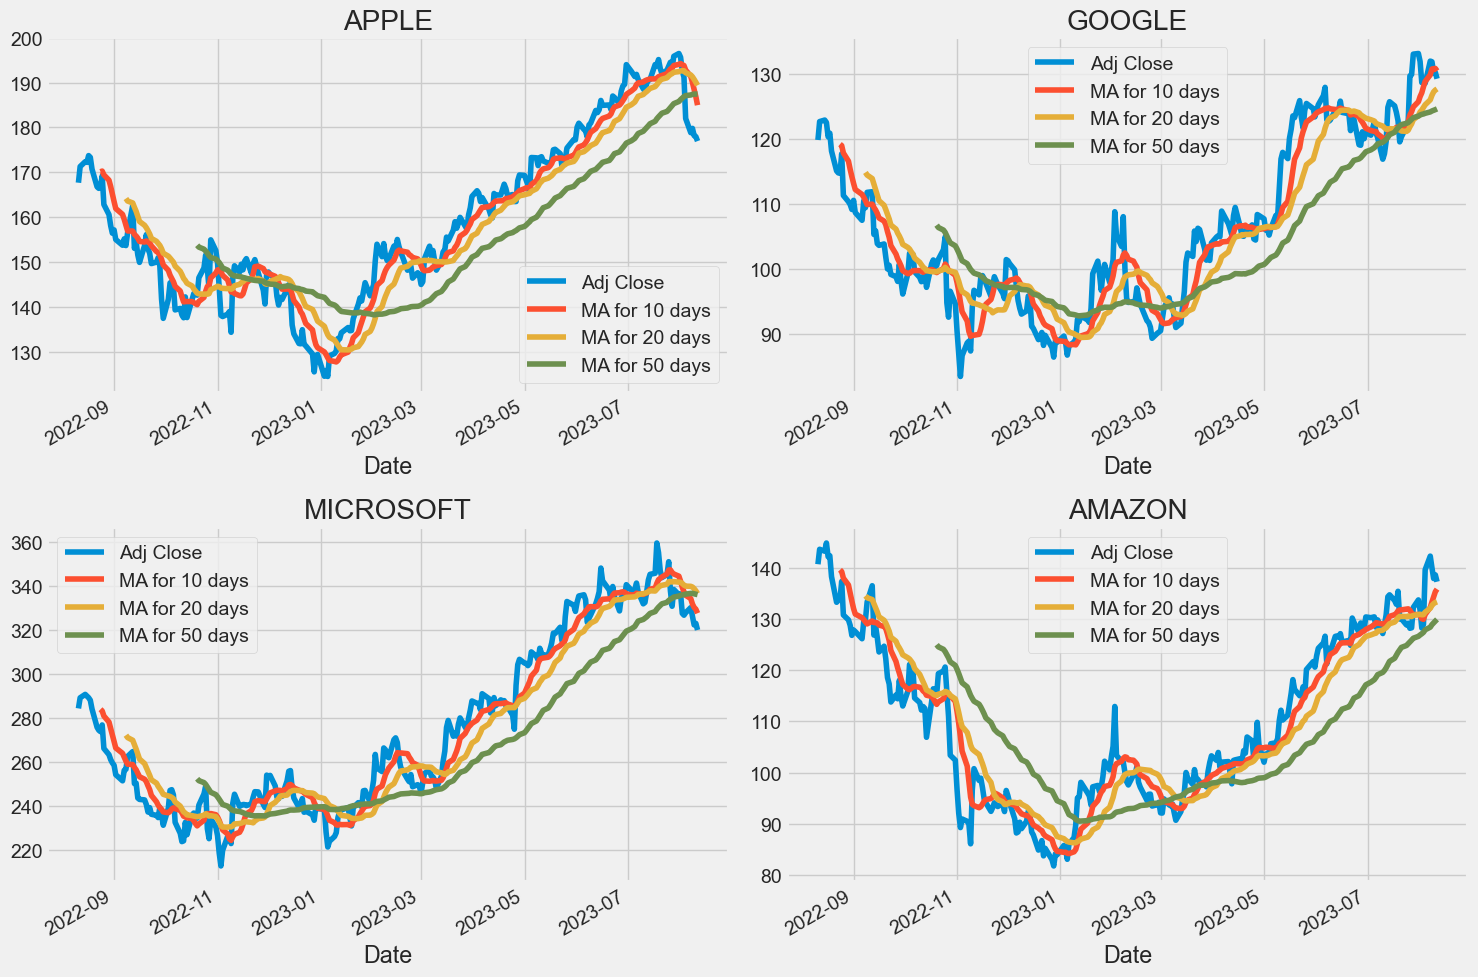

In [46]:
ma_day= [10,20,50]

for ma in ma_day:
    for company in company_list:
        column_name= f'MA for {ma} days'
        company[column_name]= company['Adj Close'].rolling(ma).mean()


fig,axes= plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [ ]:
3. What was the daily return of the stock on average?

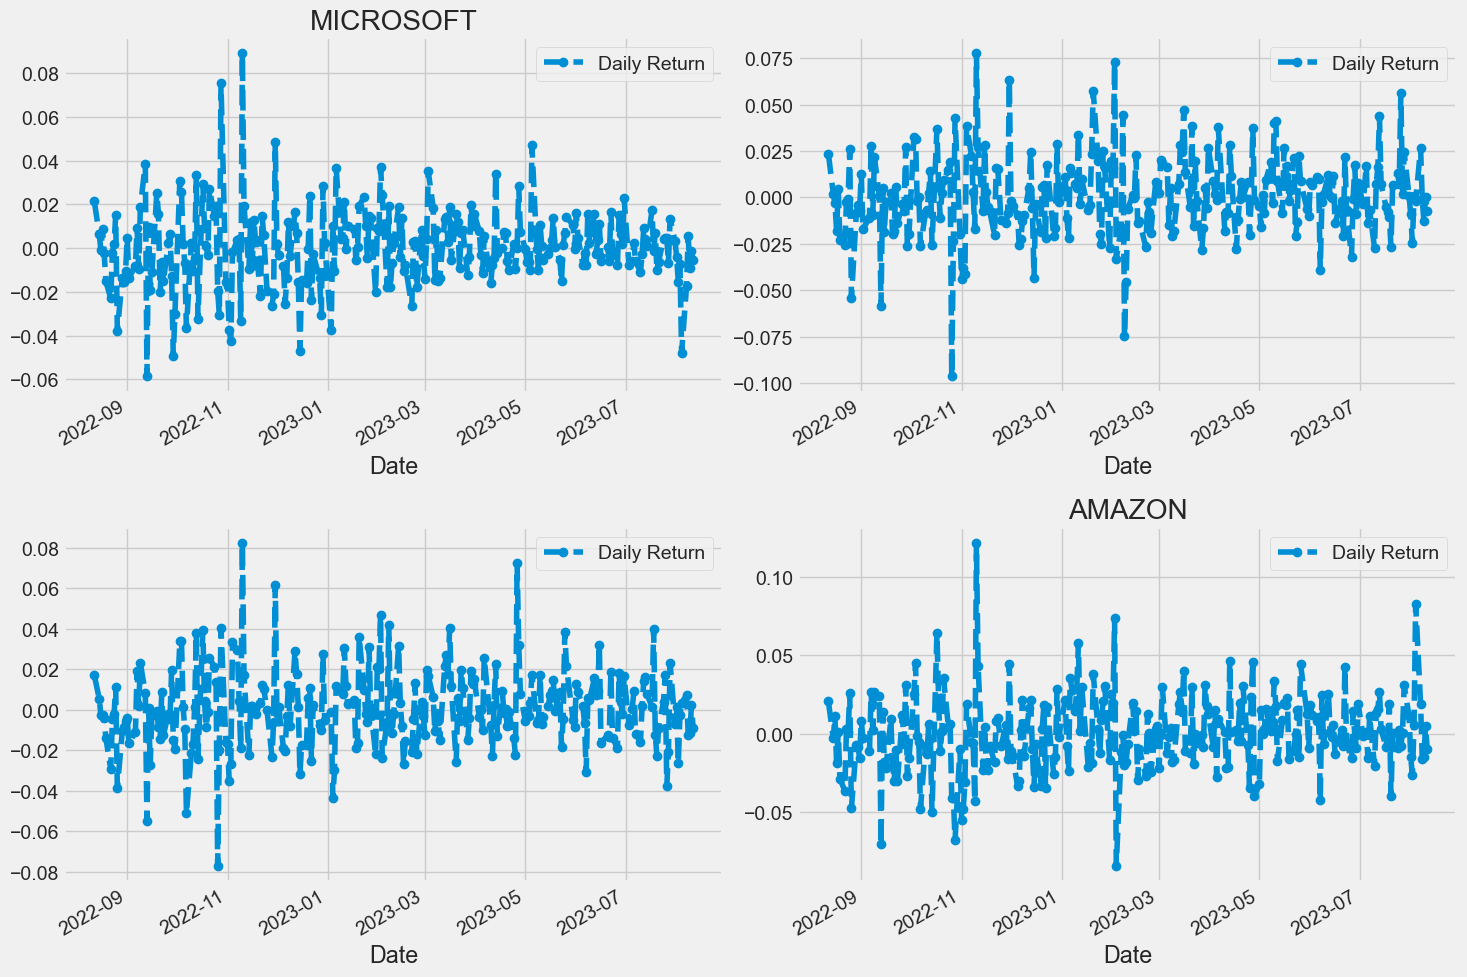

In [51]:
#We will use the pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return']= company['Adj Close'].pct_change()
    
#Then we'll plot the daily return percentage
fig, axes= plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0],legend=True,linestyle='--',marker='o')
axes[0,0].set_title('AAPLE')

GOOG['Daily Return'].plot(ax=axes[0,1],legend=True,linestyle='--',marker='o')
axes[0,0].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0],legend=True,linestyle='--',marker='o')
axes[0,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1],legend=True,linestyle='--',marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

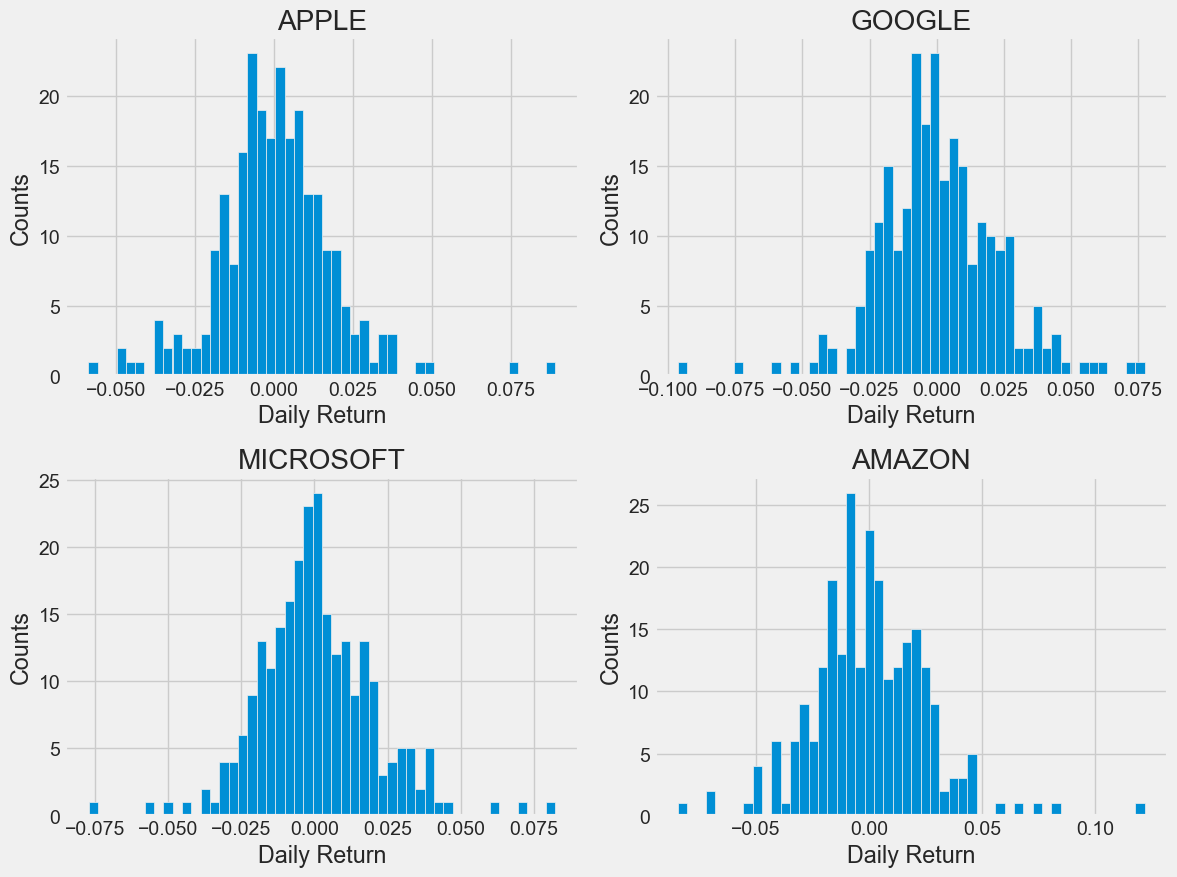

In [58]:
#Avg daily return
plt.figure(figsize=(12,9))

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [60]:
#Grab all the closing prices for the tech stock list in the one DataFrame

closing_df= pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

#Make a new tech returns Dataframe
tech_rets= closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-11,NaN,NaN,NaN,NaN
2022-08-12,0.021426,0.020691,0.023619,0.017037
2022-08-15,0.006333,-0.002578,0.001875,0.005344
2022-08-16,-0.000924,0.011175,-0.003011,-0.002590
2022-08-17,0.008785,-0.018511,-0.017876,-0.002636


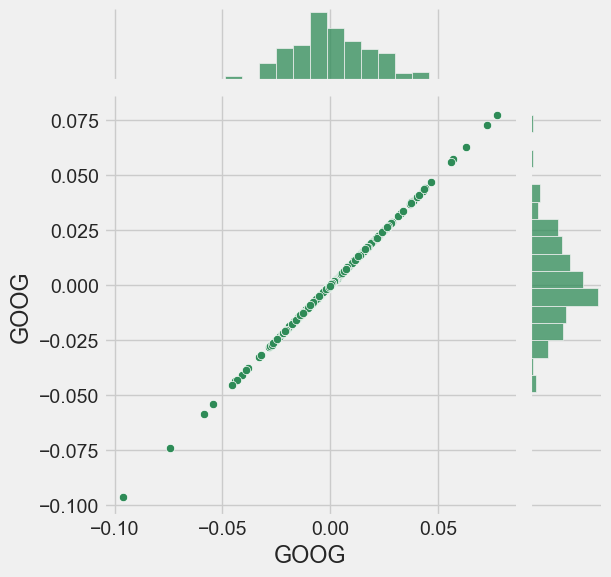

In [62]:
#Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG',y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

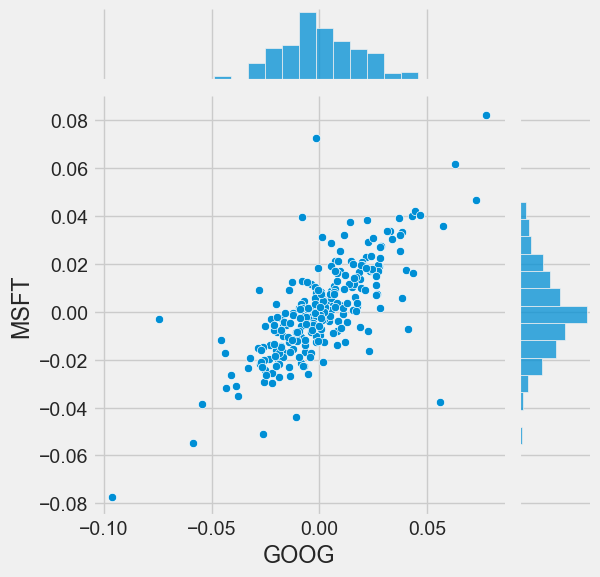

In [65]:
#We'll use the jontplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind= 'scatter')

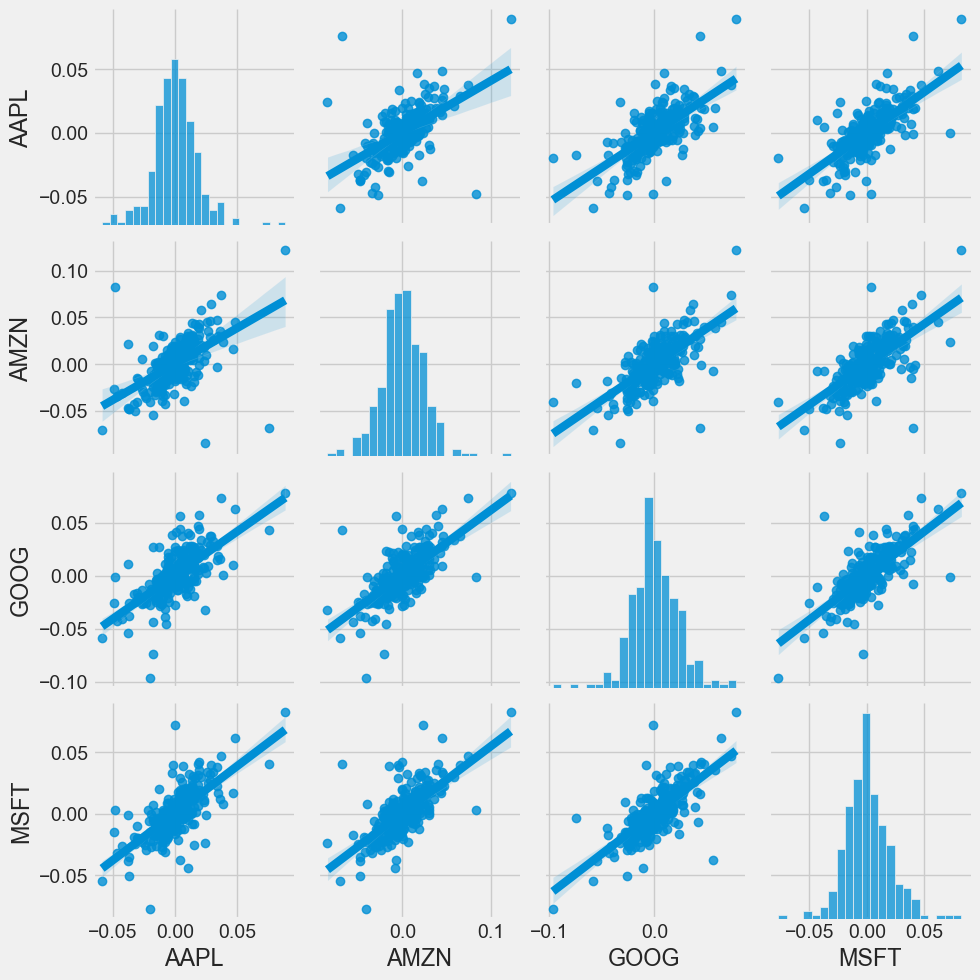

In [68]:
#We will call the pairplot to our dataframe for an automatic visual analysis
# of all the comparisons 
sns.pairplot(tech_rets, kind='reg')

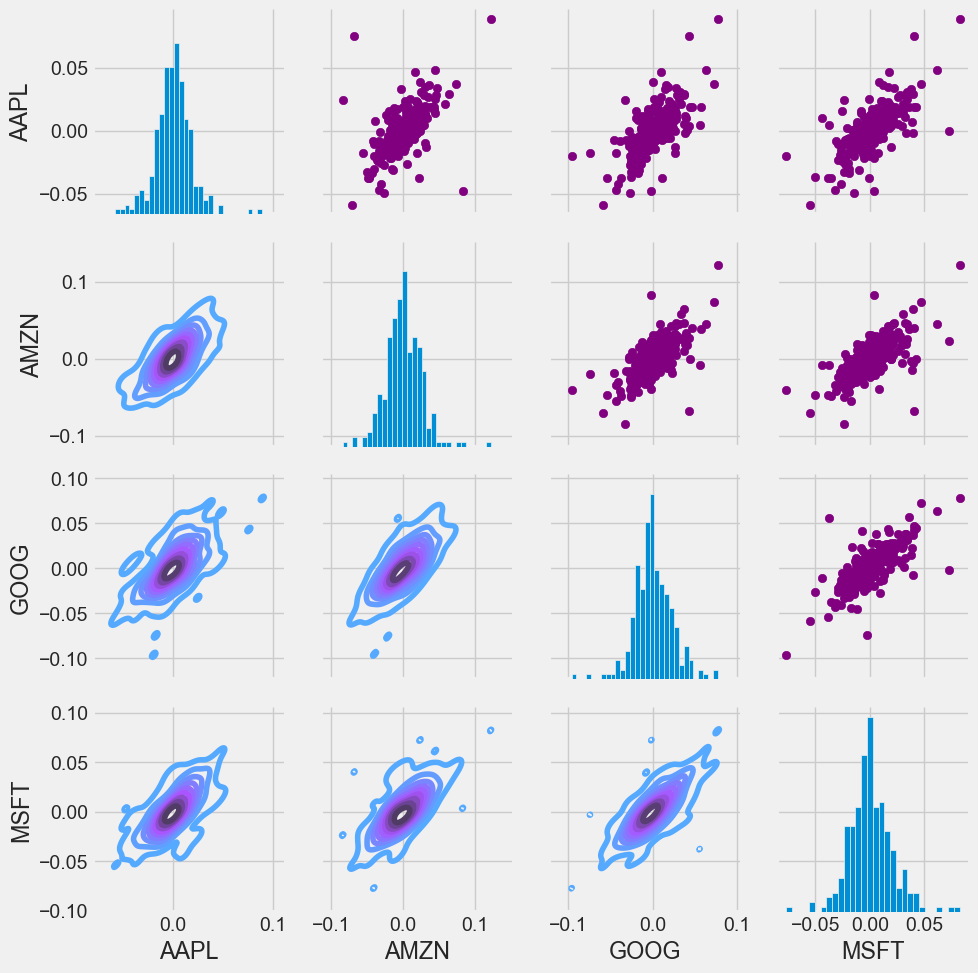

In [73]:
#Set up our figure by naming it reutrns_fig call PairPLot on the DataFrame
return_fig= sns.PairGrid(tech_rets.dropna())

#Using map_upper we can specify what the upper triangle will look like
return_fig.map_upper(plt.scatter, color='purple')

#We can also define te lower triangle in the figure, including the plot type (kde)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

#Finally we'll define the diagnol as a series of histogram plots of daily return
return_fig.map_diag(plt.hist, bins=30)

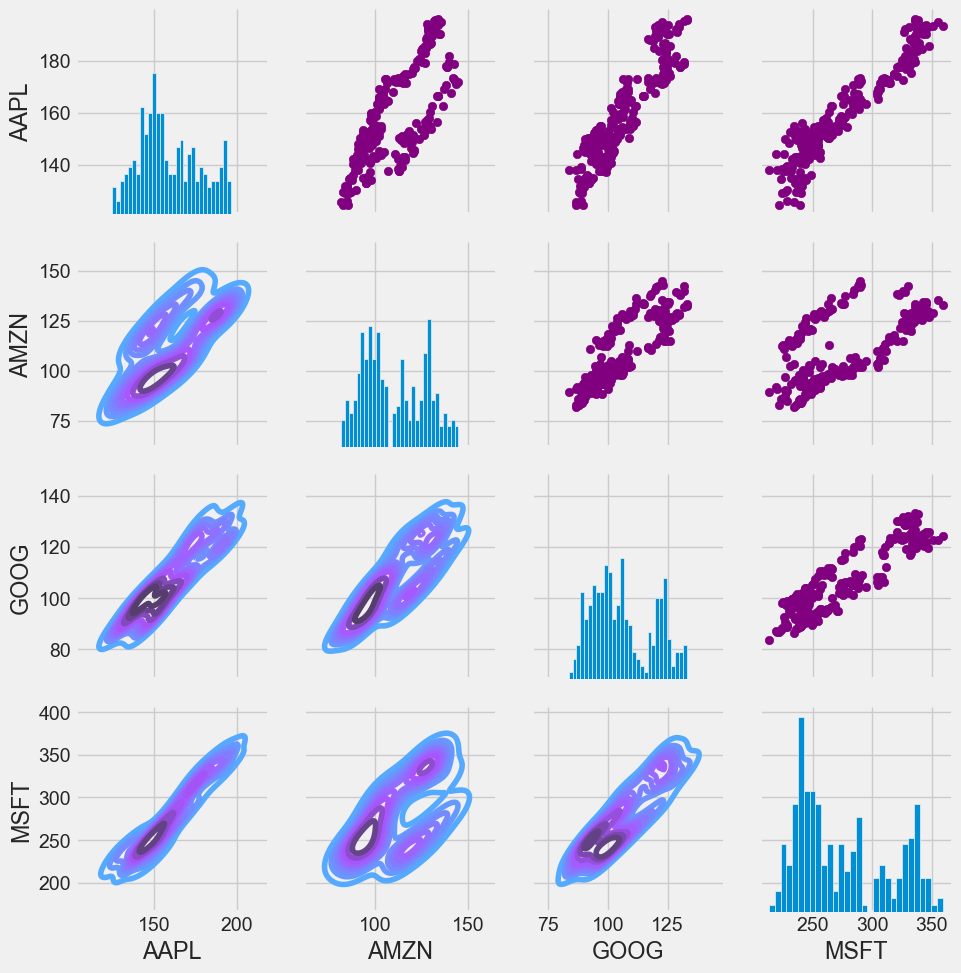

In [75]:
#Set up a figure by naming it returns_fig, call PairPlot on the DataFrame
returns_fig= sns.PairGrid(closing_df)

#Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color='purple')

#We can also define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
#Finally we'll define the diagnol as a series of histogram plots of the dail return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

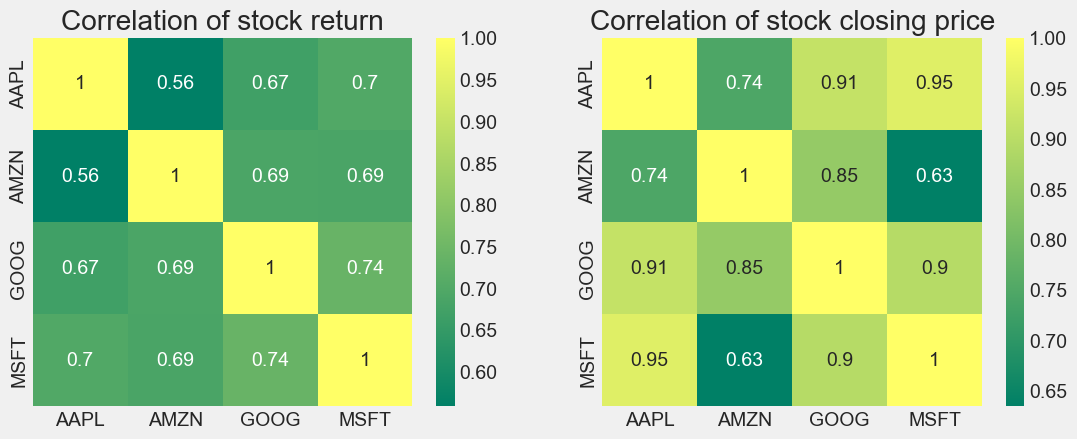

In [76]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

In [ ]:
5. How much value do we put at risk by investing in a particular stock?

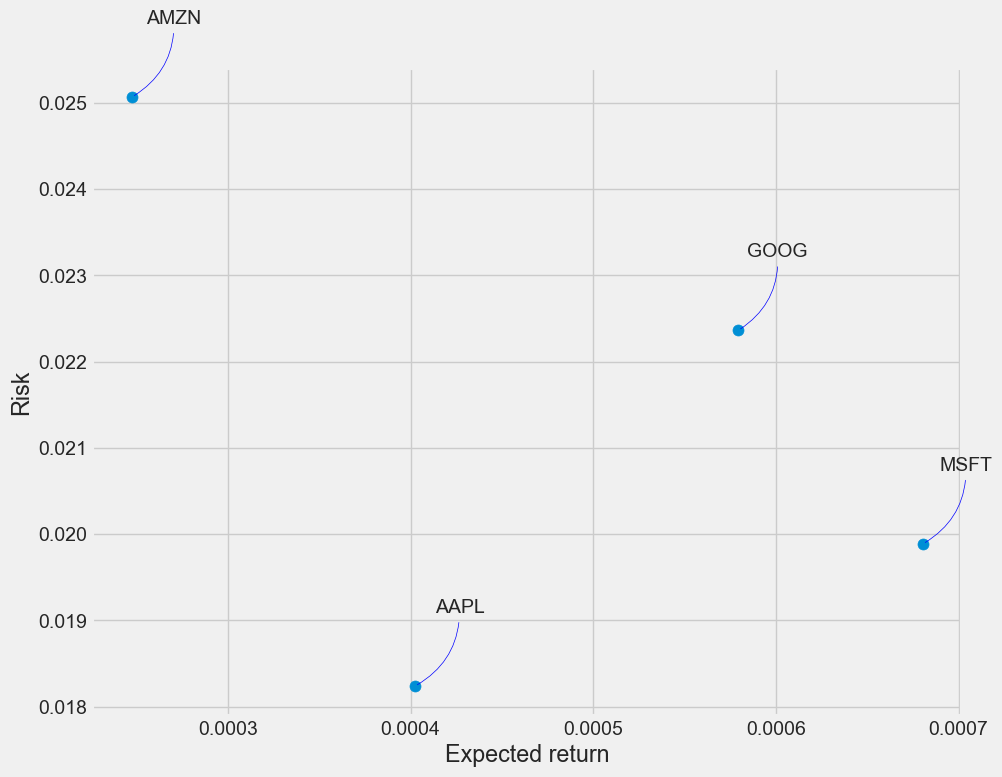

In [77]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))